In [243]:
import numpy as np 
import matplotlib.pyplot as plt

In [244]:
# generaing the datatset
data_count = 500
test_percent = 0.3
train_count = round(data_count * (1 - test_percent))
test_count = round(data_count * test_percent)
# random data from 1000 to 3000 (the area of the house in feet^2)
area = np.random.rand(data_count) * 2000 + 1000   
# random data from 1 to 10 (the number of rooms in the house)
rooms = np.random.rand(data_count) * 9 + 1
# random data from 1 to 5 (the number of bathrooms in the house)
bathrooms = np.random.rand(data_count) * 4 + 1
# random data from 1 to 3 (the number of floors in the house)
floors = np.random.rand(data_count) * 2 + 1
# random data from 1 to 20 (the number of years since the house was built)
age = np.random.rand(data_count) * 19 + 1

# generate x_train (the features of the house)
x_train = np.array([area, rooms, bathrooms, floors, age]).T
x_test = x_train[train_count:]
x_train = x_train[:train_count]

# generate y_train (the price of the house)
y_train = x_train.dot(np.array([50, 5000, 8000, 10000, -500])) + 10000
y_test = x_test.dot(np.array([50, 5000, 8000, 10000, -500])) + 10000

feature_count = x_train.shape[1]
print(y_train[0:10])      

[167991.74243602 234101.53249611 236195.884357   193174.67605995
 203334.82499943 188386.92073747 208877.13617694 216576.58871648
 145343.97699478 172095.47504506]


In [245]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x = x_train.copy()
original_y = y_train
def normalize(x,y=None):
    for i in range(x.shape[1]):
        x[:, i] = (x[:, i] - np.mean(x[:, i])) / np.std(x[:, i])
    if y is not None:
        y = (y - np.mean(y)) / np.std(y)
    return x, y
# normalize y_train
x_train, y_train = normalize(x_train, y_train)
print(y_train[0:10])
print(x_train[0:3])

[-0.18675515  1.84508268  1.90945111  0.58722458  0.8994896   0.44007629
  1.06982863  1.30646588 -0.88281826 -0.06062982]
[[-1.45775458  1.40831168  0.91817055  1.21162187 -0.72880477]
 [ 0.59878634  1.66987692  1.64860325  1.43665256  0.73564406]
 [ 1.26748912  0.42727932  1.77402745  0.10048109 -1.4717226 ]]


<Figure size 1000x1000 with 0 Axes>

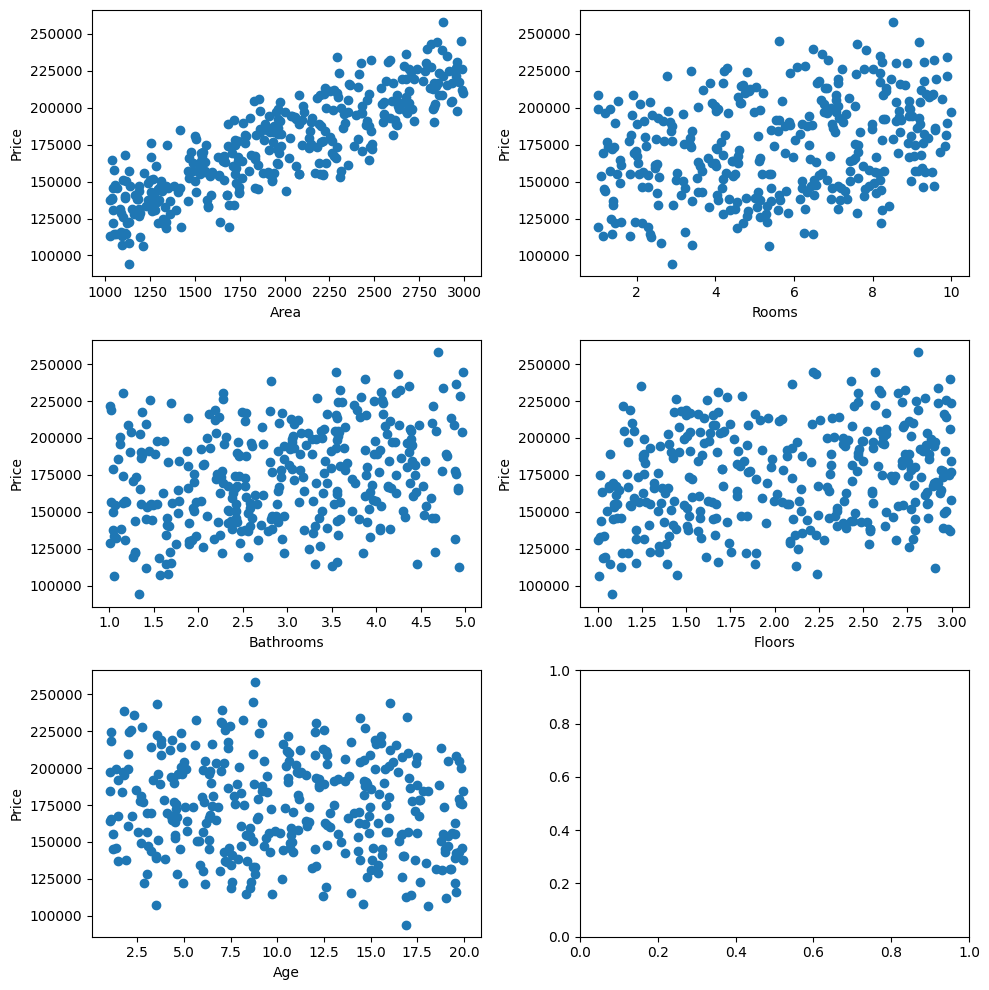

In [246]:
# plot the data
plt.figure(figsize=(10, 10))
# create a function to plot the data (works for any number of features)
def plot_features(x_train, y_train):
    features = ['Area', 'Rooms', 'Bathrooms', 'Floors', 'Age']
    fig, axs = plt.subplots(3, 2, figsize=(10,10))
    axs = axs.ravel()
    for i in range(x_train.shape[1]):
        axs[i].scatter(x_train[:, i], y_train)
        axs[i].set_xlabel(features[i])
        axs[i].set_ylabel('Price')
    plt.tight_layout()
    plt.show()
    
plot_features(original_x, original_y)



In [247]:
def compute_cost(x,y,thetas):
    return np.sum((x.dot(thetas) - y)**2) / (2*len(x))

In [248]:
# give initial values for theta
thetas = np.random.rand(feature_count + 1)
# add column of ones to x_train
x_train = np.insert(x_train, 0, 1, axis=1)
thetas

array([0.67695702, 0.14351427, 0.29992198, 0.38371579, 0.68625024,
       0.90447414])

In [249]:
def gradient(thetas, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,thetas) > 0.01 and iterations > 0):
        thetas = thetas - alpha * np.sum((x.dot(thetas) - y)*x.T, axis=1) / len(x)
        costs.append(compute_cost(x,y,thetas))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return thetas

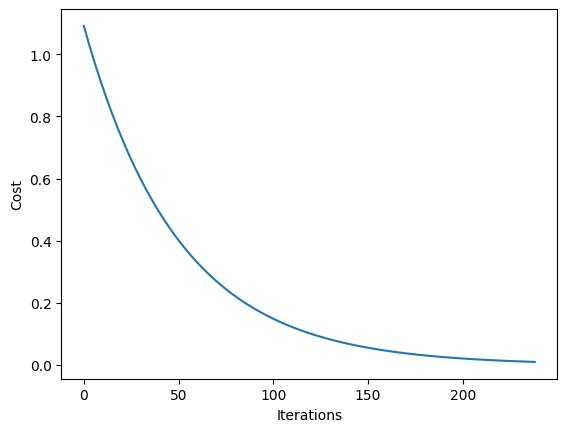

[0.0612876  0.8167959  0.36420023 0.29223923 0.24845158 0.00632836]


In [250]:
thetas = gradient(thetas, x_train, y_train, 0.01, 1250, True)
print(thetas)

[166844.84087714 179397.47007004 181555.12641091 165738.76800679
 177759.20627324 144538.25783793 164330.33541481 103532.75925427
 134743.43160182 145744.17764935]
[167991.74243602 234101.53249611 236195.884357   193174.67605995
 203334.82499943 188386.92073747 208877.13617694 216576.58871648
 145343.97699478 172095.47504506]


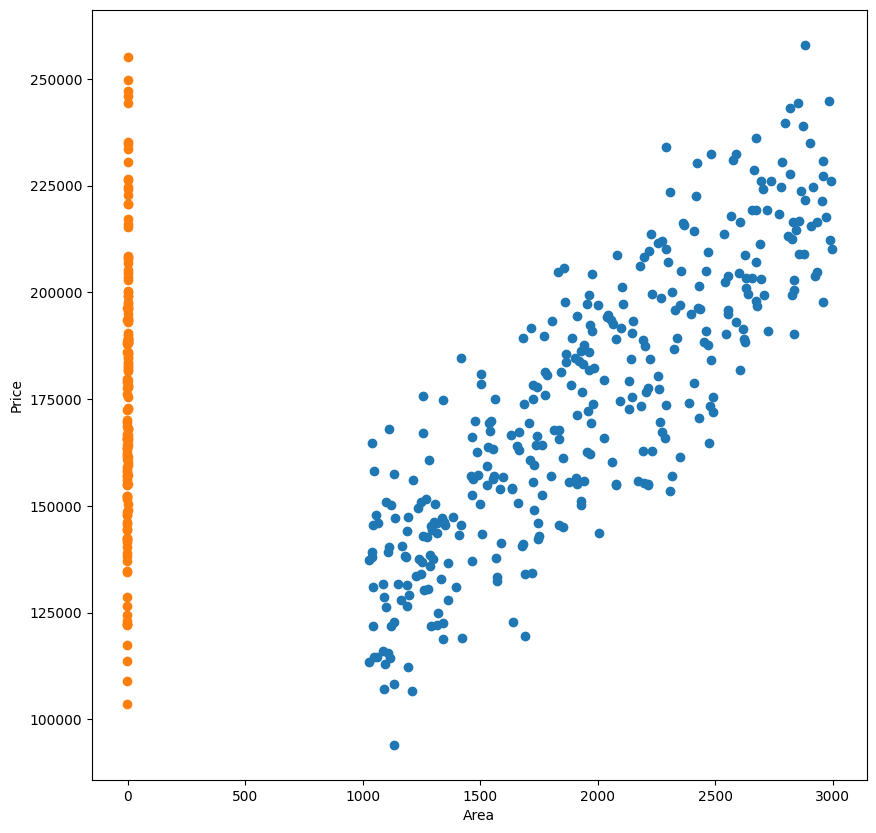

In [251]:

# make predictions
x_test_normalized = normalize(x_test)[0]
x_test_normalized = np.insert(x_test_normalized, 0, 1, axis=1)
y_test = x_test_normalized.dot(thetas)
y_test = y_test * np.std(original_y) + np.mean(original_y)
print(y_test[0:10])
print(original_y[0:10])
# plot the data in term of the first feature
plt.figure(figsize=(10, 10))
plt.scatter(original_x[:, 0], original_y)
plt.scatter(x_test[1:, 0], y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

ValueError: x and y must be the same size

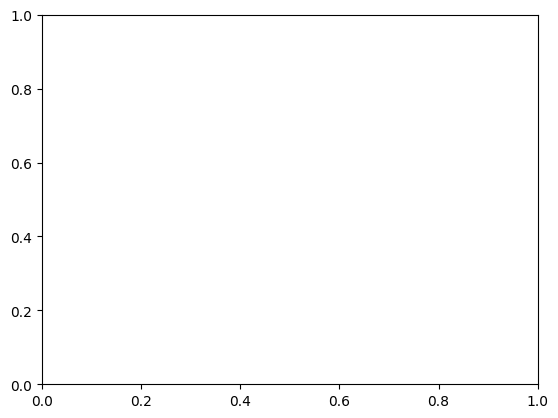

In [252]:
# get the original data
original_y_test= y_test * np.std(original_y) + np.mean(original_y)
# plot the original data
plt.scatter(original_x_train, original_y_train)
plt.plot(original_x_train, original_y_test, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()


In [ ]:
# check the accuracy of the model
# this broken fix it
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

score =r2_score(original_y_train, original_y_test)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

The model is accurate with a score of 0.92421
